<a href="https://colab.research.google.com/github/varshith302/b.sri-varshith-reddy/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Salary_dataset.csv')
display(df.head())



,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


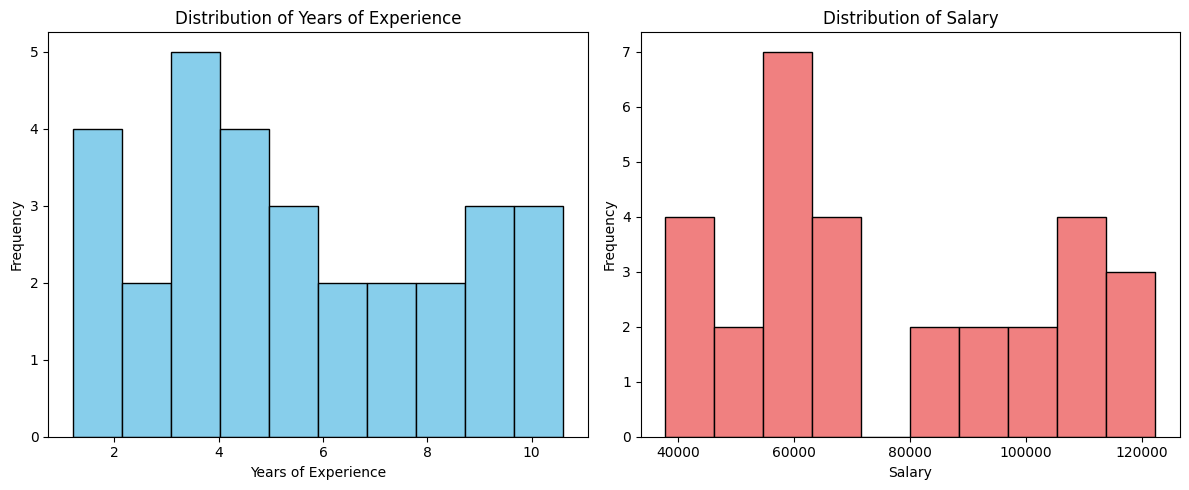


Basic Statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.subplot(1, 2, 2)
plt.hist(df['Salary'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.tight_layout()
plt.show()
print("\nBasic Statistics:")
print(df[['YearsExperience', 'Salary']].describe())

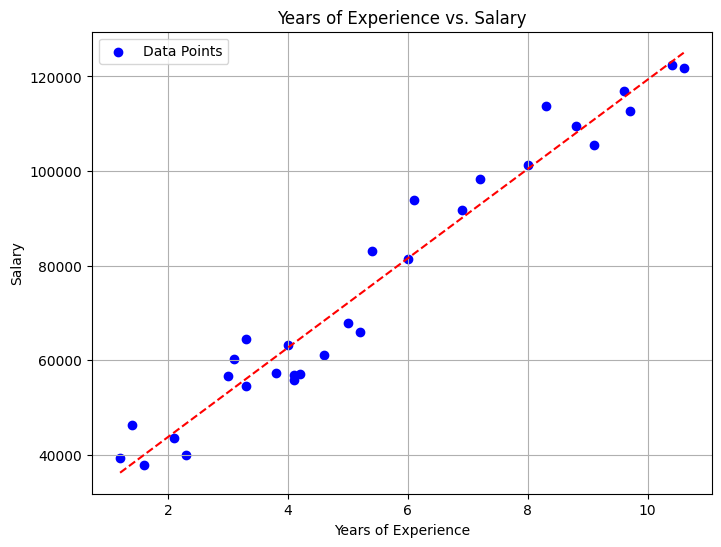

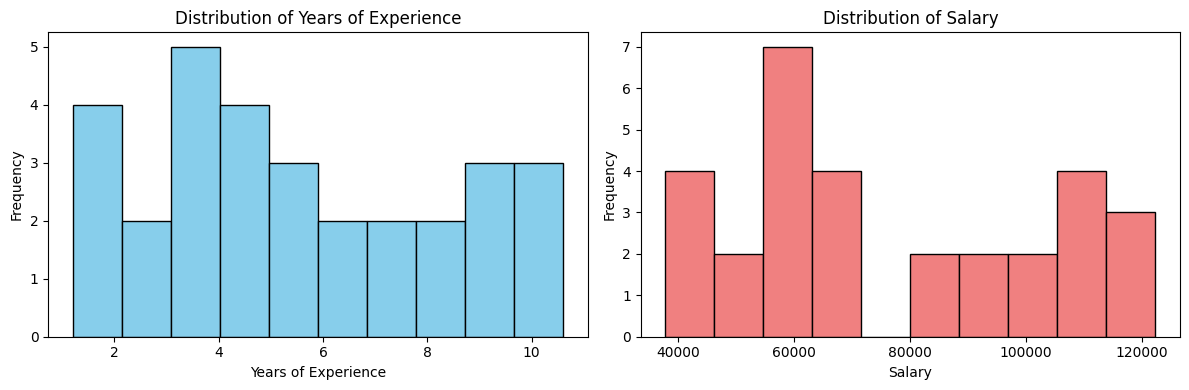

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Data Points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.legend()
plt.grid(True)

z = np.polyfit(df['YearsExperience'], df['Salary'], 1)
p = np.poly1d(z)
plt.plot(df['YearsExperience'],p(df['YearsExperience']),"r--", label="Trendline")

plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')

plt.subplot(1, 2, 2)
plt.hist(df['Salary'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()



In [5]:
from sklearn.model_selection import train_test_split

X = df['YearsExperience']
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train_reshaped = X_train.values.reshape(-1, 1)

model.fit(X_train_reshaped, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_test_reshaped = X_test.values.reshape(-1, 1)

y_pred = model.predict(X_test_reshaped)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Intercept: 24380.201479473704
Coefficient: [9423.81532303]
R-squared: 0.9024461774180497
Mean Squared Error (MSE): 49830096.855908394
Root Mean Squared Error (RMSE): 7059.04362190151


In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_test_reshaped = X_test.values.reshape(-1, 1)

y_pred = model.predict(X_test_reshaped)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.9024461774180497
Mean Squared Error (MSE): 49830096.855908394
Root Mean Squared Error (RMSE): 7059.04362190151


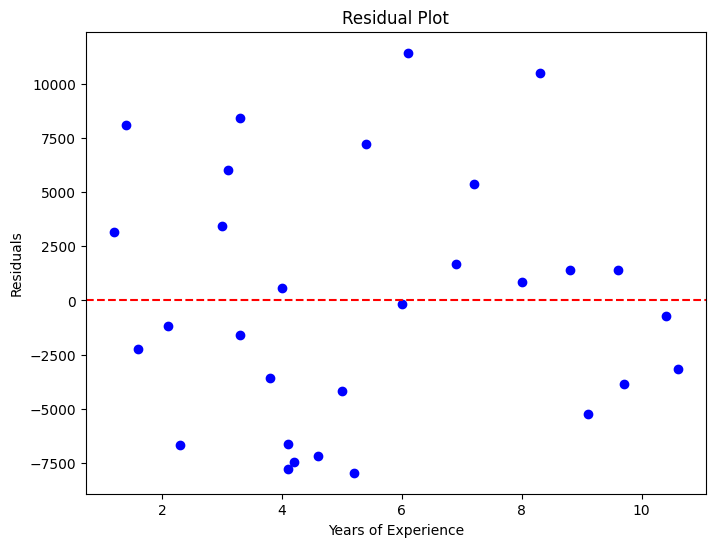

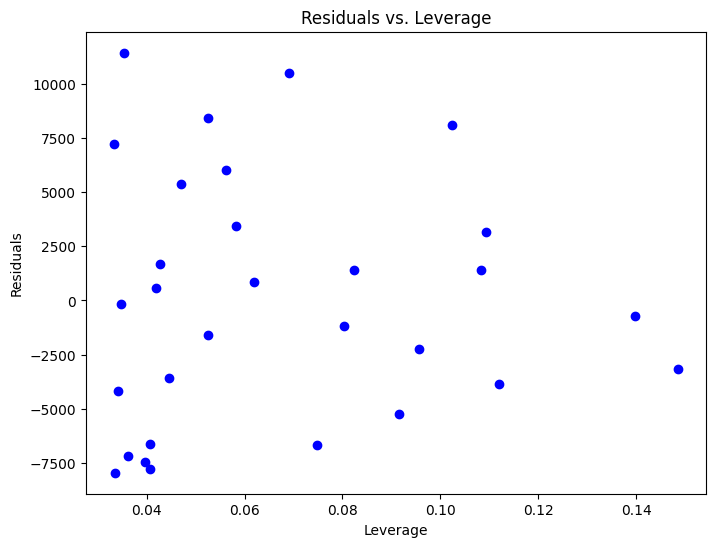

New Model R-squared: 0.9024461774180497
New Model MSE: 49830096.855908394
New Model RMSE: 7059.04362190151


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Years of Experience")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

n = len(X)
h = np.zeros(n)
for i in range(n):
    h[i] = 1/n + ((X[i] - np.mean(X))**2) / np.sum((X - np.mean(X))**2)

plt.figure(figsize=(8, 6))
plt.scatter(h, residuals, color='blue')
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs. Leverage")
plt.show()

df_no_outliers = df.copy()
outlier_indices = np.where((h > 0.1) & (np.abs(residuals) > 10000))[0]
if outlier_indices.size > 0:
    df_no_outliers = df_no_outliers.drop(outlier_indices)

X_no_outliers = df_no_outliers['YearsExperience']
y_no_outliers = df_no_outliers['Salary']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

model_no_outliers = LinearRegression()
X_train_no_outliers = X_train_no_outliers.values.reshape(-1, 1)
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
X_test_no_outliers = X_test_no_outliers.values.reshape(-1,1)
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse_no_outliers = np.sqrt(mse_no_outliers)

print(f"New Model R-squared: {r2_no_outliers}")
print(f"New Model MSE: {mse_no_outliers}")
print(f"New Model RMSE: {rmse_no_outliers}")

